# 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)


In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# reading the csv file
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
# taking a copy of input data for future reference
raw_data = data

In [4]:
data.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
data.shape

(5000, 14)

In [7]:
data.info()
# all the fields are numeric data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
# to check if any null data in any of the columns
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Callout**

- 5000 rows and 14 columns
- All the columns are numeric (float or integer)
- And no null values in amy of the columns

In [9]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
# Looking at the output of describe() for all columns, It looks like Experience columns have some negative values
data[data["Experience"]<0].shape

(52, 14)

In [11]:
#Impute experience = 0 for all negative values
data.loc[data['Experience'] < 0, ['Experience']] = 0

In [12]:
# To check if any records still have negative Experience
data[data["Experience"]<0].shape

(0, 14)

In [13]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.440484,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Callout**

- Looking at the output of describe() for all columns, It looks like Experience columns have some negative values
- Imputed negative experience with zero
- Describe() post impute excercise looks good
- Describe() is used here to display the summary statistics

# 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
## Number of unique in each column?
## Number of people with zero mortgage?
## Number of people with zero credit card spending per month?
## Value counts of all categorical columns.
## Univariate and Bivariate
## Get data model ready

# Number of unique in each column?

In [14]:
print ('Number of uniques in each column')
for i,j in enumerate(data.columns):
    print (j)
    print (data[j].nunique())
    print ('--------------------------')
    

Number of uniques in each column
ID
5000
--------------------------
Age
45
--------------------------
Experience
44
--------------------------
Income
162
--------------------------
ZIP Code
467
--------------------------
Family
4
--------------------------
CCAvg
108
--------------------------
Education
3
--------------------------
Mortgage
347
--------------------------
Personal Loan
2
--------------------------
Securities Account
2
--------------------------
CD Account
2
--------------------------
Online
2
--------------------------
CreditCard
2
--------------------------


# Number of people with zero mortgage?

In [15]:
print ('Number of people with zero mortgage:')
print (data[data['Mortgage']==0]['ID'].count())

Number of people with zero mortgage:
3462


In [16]:
# Validation
data.groupby('Mortgage')['ID'].count()

Mortgage
0      3462
75        8
76       12
77        4
78       15
       ... 
590       1
601       1
612       1
617       1
635       1
Name: ID, Length: 347, dtype: int64

# Number of people with zero credit card spending per month?

In [17]:
print ('Number of people with zero credit card spending per month?')
print (data[data['CCAvg']==0]['ID'].count())


Number of people with zero credit card spending per month?
106


# Value counts of all categorical columns.

In [18]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [19]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [20]:

cat_columns = ['Family','Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

#Value counts of all categorical columns.
for i,j in enumerate(cat_columns): 
    print("Value counts of %s column:" %j)
    print (data[j].value_counts(normalize=True ))
    print ("------------------------------")

Value counts of Family column:
1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64
------------------------------
Value counts of Education column:
1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64
------------------------------
Value counts of Personal Loan column:
0    0.904
1    0.096
Name: Personal Loan, dtype: float64
------------------------------
Value counts of Securities Account column:
0    0.8956
1    0.1044
Name: Securities Account, dtype: float64
------------------------------
Value counts of CD Account column:
0    0.9396
1    0.0604
Name: CD Account, dtype: float64
------------------------------
Value counts of Online column:
1    0.5968
0    0.4032
Name: Online, dtype: float64
------------------------------
Value counts of CreditCard column:
0    0.706
1    0.294
Name: CreditCard, dtype: float64
------------------------------


In [21]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [22]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# Univariate and Bivariate Analysis

In [23]:
data_x_cont_variables = data[[ 'Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage','Personal Loan']].copy()

print (" Mean of different columns by Personal Loan")
print (" ------------------------------------------")
print (data_x_cont_variables.groupby('Personal Loan').mean())


print (" Median of different columns by Personal Loan")
print (" ------------------------------------------")
print (data_x_cont_variables.groupby('Personal Loan').median())


 Mean of different columns by Personal Loan
 ------------------------------------------
                     Age  Experience      Income    Family     CCAvg  \
Personal Loan                                                          
0              45.367257   20.148894   66.237389  2.373451  1.729009   
1              45.066667   19.843750  144.745833  2.612500  3.905354   

               Education    Mortgage  
Personal Loan                         
0               1.843584   51.789381  
1               2.233333  100.845833  
 Median of different columns by Personal Loan
 ------------------------------------------
                Age  Experience  Income  Family  CCAvg  Education  Mortgage
Personal Loan                                                              
0              45.0        20.0    59.0     2.0    1.4        2.0       0.0
1              45.0        20.0   142.5     3.0    3.8        2.0       0.0


**Callout**

- Looking at the distribution of Mean / Median with respect to the taret variable of Personal Loan 
     - No major difference in case Age, Experience, Family Size
     - But Income, CCAvg, Education and Mortgage looks to higher for the people who were approved loan before


In [24]:
data_x_cat_variables = data[['Family','Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard','Personal Loan']].copy()

In [25]:
for i,j in enumerate(data_x_cat_variables):
    print (j)
    print ("----------")
    print (pd.crosstab(data_x_cat_variables[j],data_x_cat_variables['Personal Loan'],normalize='columns')*100)
    print ("------------------------------------------------------------------------------------------------")
    



Family
----------
Personal Loan          0          1
Family                             
1              30.199115  22.291667
2              26.327434  22.083333
3              19.402655  27.708333
4              24.070796  27.916667
------------------------------------------------------------------------------------------------
Education
----------
Personal Loan          0          1
Education                          
1              44.314159  19.375000
2              27.013274  37.916667
3              28.672566  42.708333
------------------------------------------------------------------------------------------------
Securities Account
----------
Personal Loan               0     1
Securities Account                 
0                   89.778761  87.5
1                   10.221239  12.5
------------------------------------------------------------------------------------------------
CD Account
----------
Personal Loan          0          1
CD Account                         
0     

**Callout**

- More People with higher education were approve before
- More people with online access were approved before


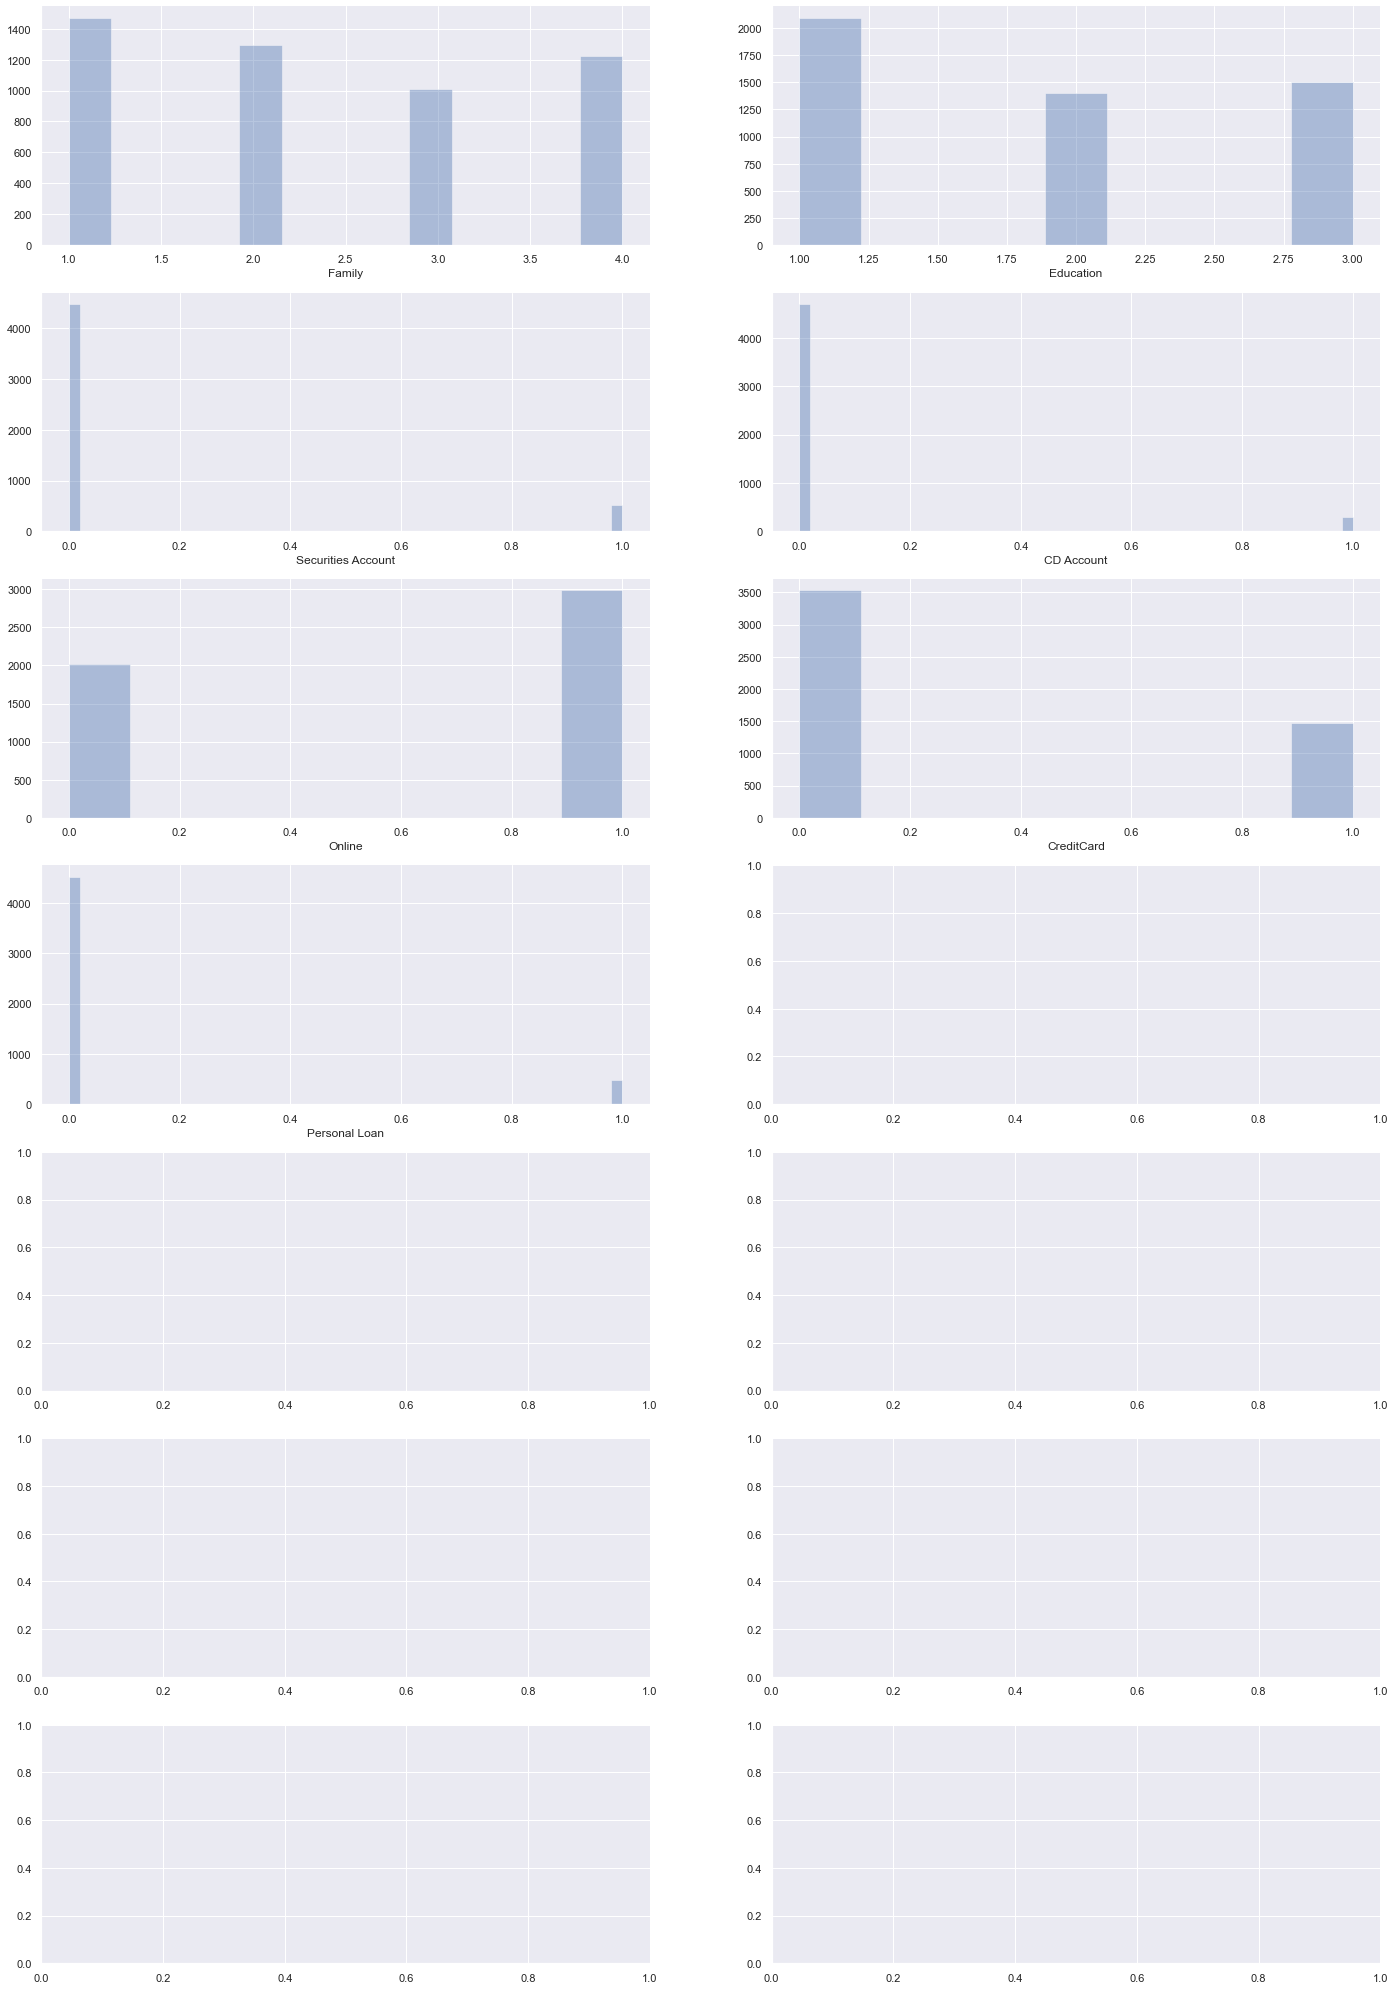

In [26]:
## Univariate and Bivariate

#Distplot of all columns
f, axes = plt.subplots(7, 2, figsize=(24, 36), sharex=False)
sns.despine(left=False)

for i,col in enumerate(data_x_cat_variables.columns):
    sns.distplot(data[col],ax=axes[i//2,i%2], kde=False)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


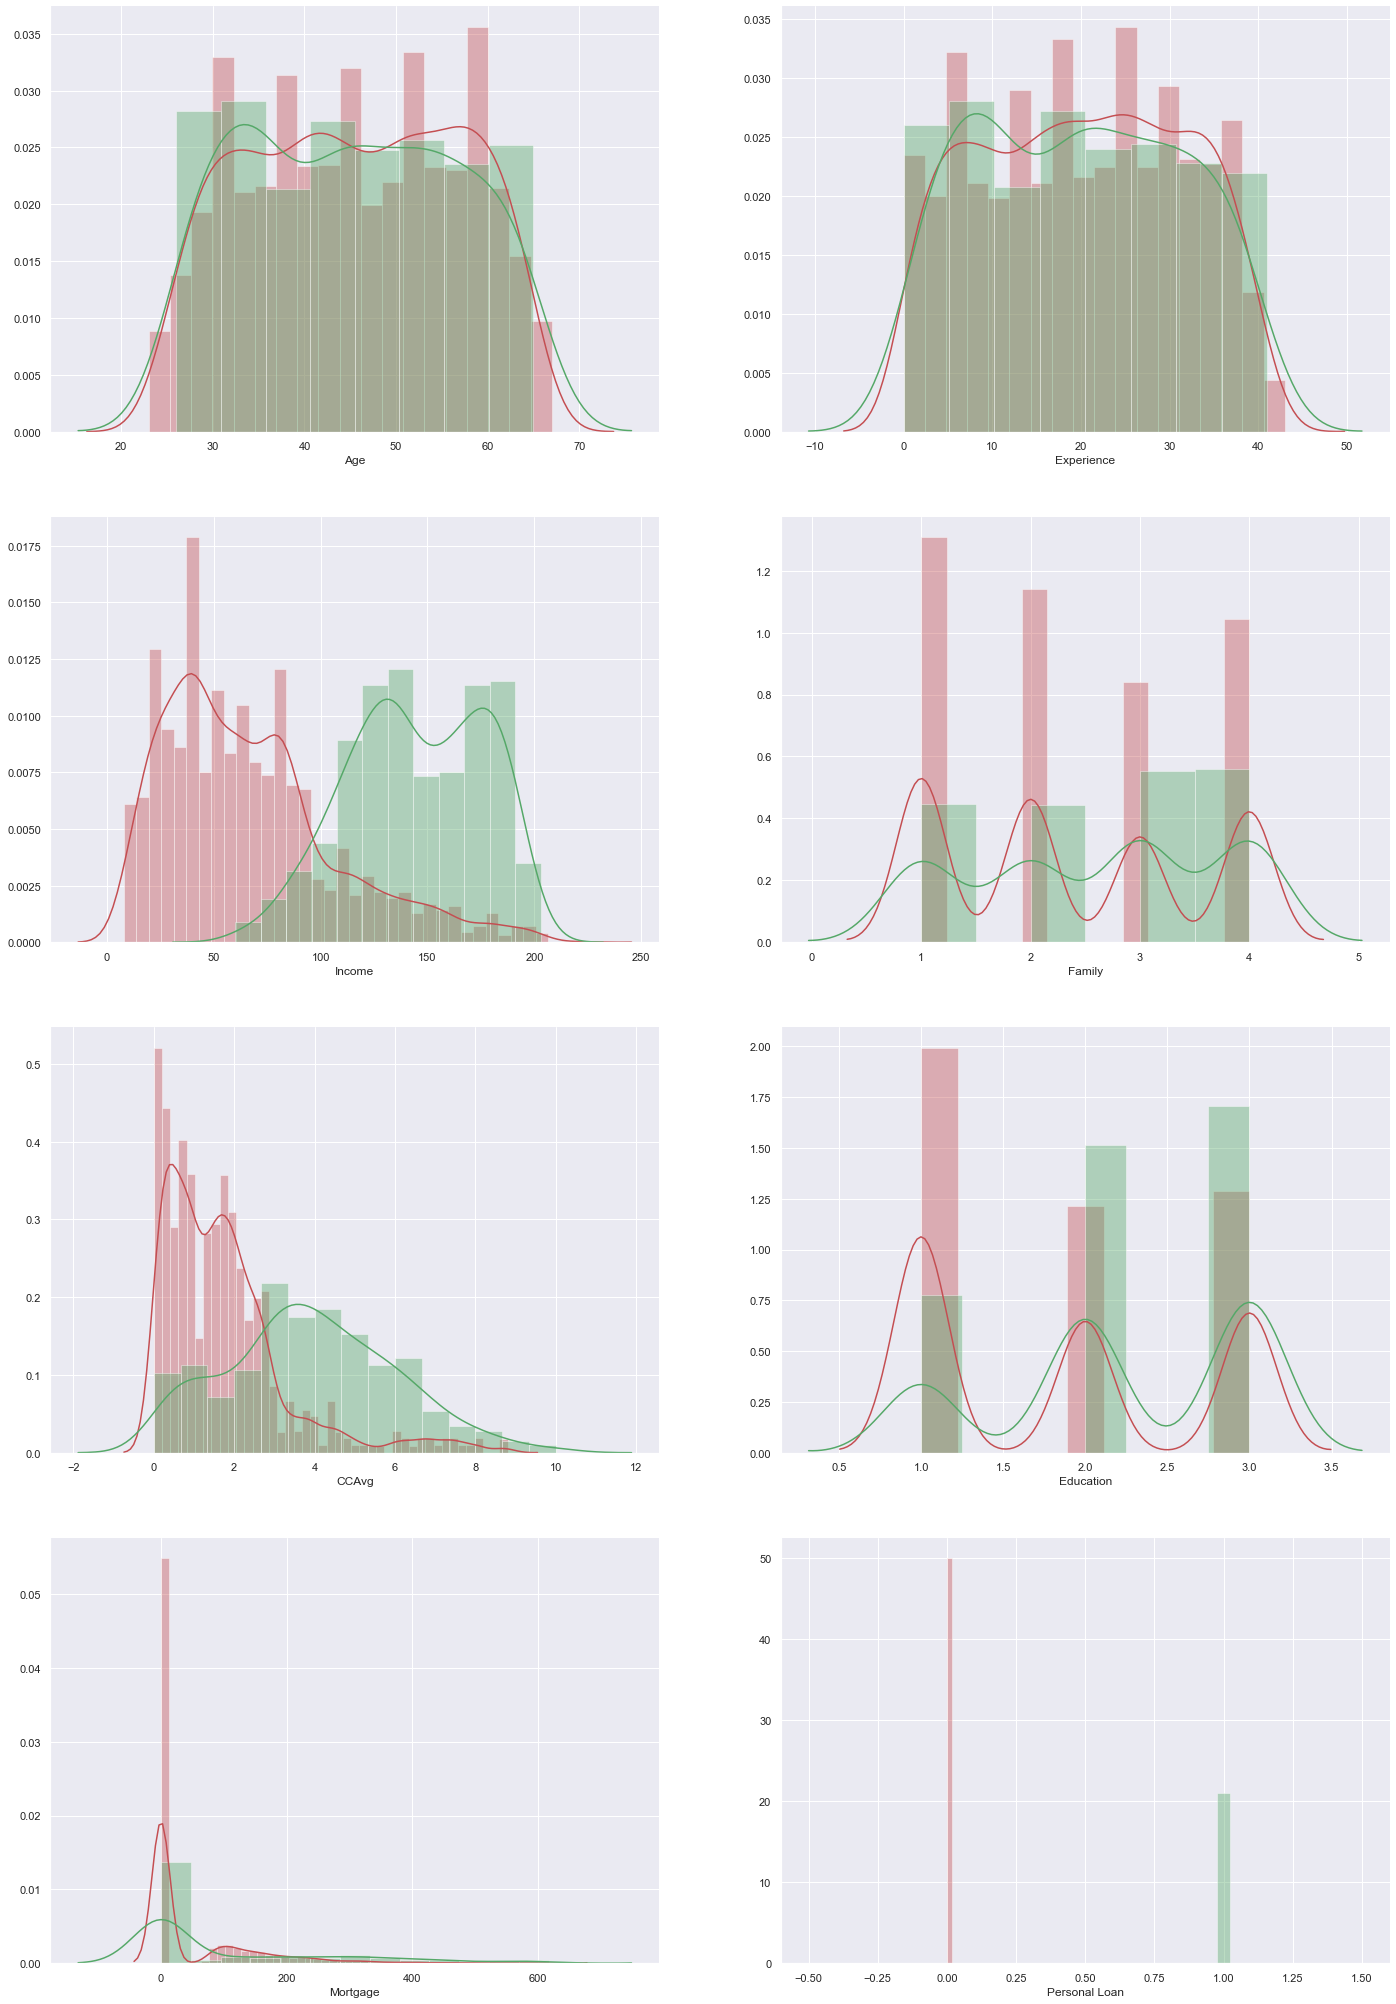

In [27]:
f, axes = plt.subplots(4, 2, figsize=(24, 36), sharex=False)
sns.despine(left=False)


for i,j in enumerate (data_x_cont_variables):
    sns.distplot(data[data['Personal Loan']==0][j],color='r',label=0,kde=True,ax=axes[i//2,i%2])
    sns.distplot(data[data['Personal Loan']==1][j],color='g',label=1,kde=True,ax=axes[i//2,i%2])


In [28]:
corr = data.corr()
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008265,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994198,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008265,0.994198,1.000000,-0.046729,-0.028783,-0.052213,-0.049912,0.013536,-0.010840,-0.007858,-0.001111,0.010046,0.013975,0.008910
Income,-0.017695,-0.055269,-0.046729,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028783,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052213,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049912,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013536,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010840,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007858,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


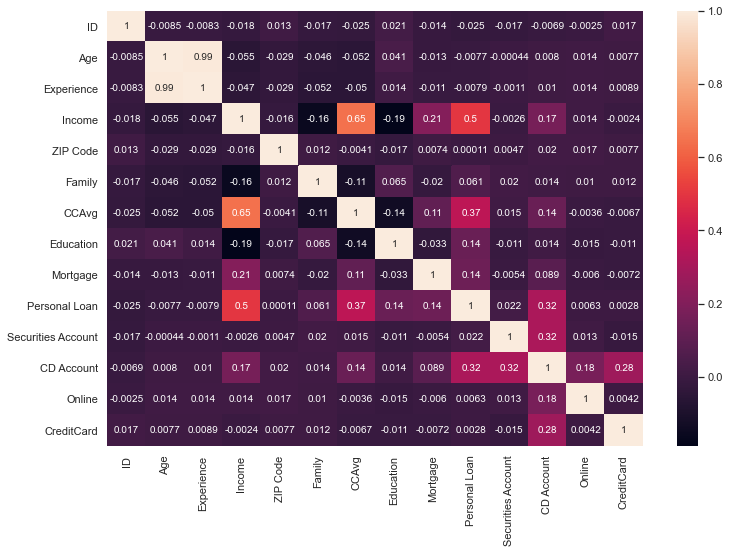

In [29]:
plt.subplots(figsize=(12,8))
sns.heatmap(corr,annot=True)

**Callout**

- Observation from distplot / pairplot and correlation heat map
     - Data is highly skewed for the zip code column
     - Same case withe the Mortgage, Not many users in the sample have morgages
     - Experience and Age are highly correlated in the positive direction
     - Income and CCAvg are positive correlated
     - Age & Experience are evenly distributed for both users (loan taken & loan not taken)


# Get data model ready

In [30]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [31]:
# Changing the dtype to category for Family and Education
data['Family'] = data['Family'].astype('category')
data['Education'] = data['Education'].astype('category')


In [32]:
data.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan            int64
Securities Account       int64
CD Account               int64
Online                   int64
CreditCard               int64
dtype: object

In [33]:
#Drop 2 columns that are not required for the logistic regression
# ID column is unique and no longer required for the regression
# Zip code is highly skewed and can be dropped from the regression model
data=data.drop(['ID','ZIP Code'],axis=1)

In [34]:
data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [35]:
y=data [['Personal Loan']]

In [36]:
x=data [['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']]

In [37]:
print (x.shape)

(5000, 11)


In [38]:
print (y.shape)

(5000, 1)


In [39]:
x.dtypes

Age                      int64
Experience               int64
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Securities Account       int64
CD Account               int64
Online                   int64
CreditCard               int64
dtype: object

In [40]:
# Adding dummy columns for all the categorical datatype columns
x=pd.get_dummies(x, drop_first=True)

In [41]:
x.columns

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family_2',
       'Family_3', 'Family_4', 'Education_2', 'Education_3'],
      dtype='object')

In [42]:
y.columns

Index(['Personal Loan'], dtype='object')

**Input Datamodels x and y are ready**


# 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

In [44]:
print("Number of records in original data")
print (data.shape[0])
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 1]), (len(data.loc[data['Personal Loan'] == 1])/len(data.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 0]), (len(data.loc[data['Personal Loan'] == 0])/len(data.index)) * 100))
print("----------------------------------------------")
print("Number of records in Training data")
print (y_train.shape[0])
print("Training data Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train.loc[y_train['Personal Loan'] == 1]), (len(y_train.loc[y_train['Personal Loan'] == 1])/len(y_train.index)) * 100))
print("Training data Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train.loc[y_train['Personal Loan'] == 0]), (len(y_train.loc[y_train['Personal Loan'] == 0])/len(y_train.index)) * 100))
print("----------------------------------------------")
print("Number of records in Test data")
print (y_test.shape[0])
print("Test data Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_test.loc[y_test['Personal Loan'] == 1]), (len(y_test.loc[y_test['Personal Loan'] == 1])/len(y_test.index)) * 100))
print("Test data Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_test.loc[y_test['Personal Loan'] == 0]), (len(y_test.loc[y_test['Personal Loan'] == 0])/len(y_test.index)) * 100))
print("----------------------------------------------")



Number of records in original data
5000
Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)
----------------------------------------------
Number of records in Training data
3500
Training data Personal Loan True Values    : 331 (9.46%)
Training data Personal Loan False Values   : 3169 (90.54%)
----------------------------------------------
Number of records in Test data
1500
Test data Personal Loan True Values    : 149 (9.93%)
Test data Personal Loan False Values   : 1351 (90.07%)
----------------------------------------------


In [45]:
x_train

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
1334,47,22,35,1.3,0,0,0,1,0,1,0,0,0,0
4768,38,14,39,2.0,0,0,0,1,0,0,0,0,1,0
65,59,35,131,3.8,0,0,0,1,1,0,0,0,0,0
177,29,3,65,1.8,244,0,0,0,0,0,0,1,1,0
4489,39,13,21,0.2,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,60,36,39,1.3,140,0,0,1,0,0,0,1,1,0
2763,55,31,13,0.7,0,0,0,1,0,0,0,1,0,0
905,46,22,28,1.0,84,0,0,1,1,0,0,0,0,0
3980,46,22,89,1.4,0,0,0,1,0,0,0,1,1,0


In [46]:
y_train

,Personal Loan
1334,0
4768,0
65,0
177,0
4489,0
...,...
2895,0
2763,0
905,0
3980,0


# 4. Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance (15 marks)

**Training the model**


In [47]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=7,solver='lbfgs', max_iter=1500)
logreg.fit(x_train, y_train['Personal Loan'])           # fit the model on train data

#As the dataset is relatively small, lbfgs and more iteration of 1500 is used

LogisticRegression(max_iter=1500, random_state=7)

In [48]:
y_predict = logreg.predict(x_test)              # Predicting the target variable on test data

In [49]:
# Observe the predicted and observed classes in a dataframe.

z = x_test.copy()
z['Observed Personal Loan'] = y_test
z['Predicted Persoanal Loan'] = y_predict
z.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Observed Personal Loan,Predicted Persoanal Loan
2764,31,5,84,2.9,105,0,0,0,1,0,0,0,0,1,0,0
4767,35,9,45,0.9,101,1,0,0,0,0,1,0,0,0,0,0
3814,34,9,35,1.3,0,0,0,0,0,0,1,0,0,0,0,0
3499,49,23,114,0.3,286,0,0,1,0,0,0,0,0,0,0,0
2735,36,12,70,2.6,165,0,0,1,0,0,1,0,1,0,0,0


In [50]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9614285714285714

Testing accuracy 0.952

Confusion Matrix


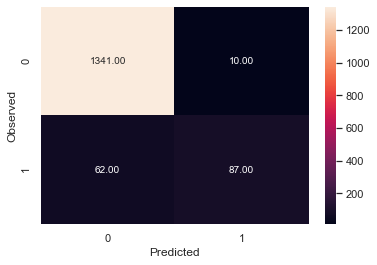

None

Recall: 0.5838926174496645

Precision: 0.8969072164948454

F1 Score: 0.7073170731707318

Roc Auc Score: 0.7882453464746472


In [51]:
print("Trainig accuracy",logreg.score(x_train,y_train))  
print()
print("Testing accuracy",logreg.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

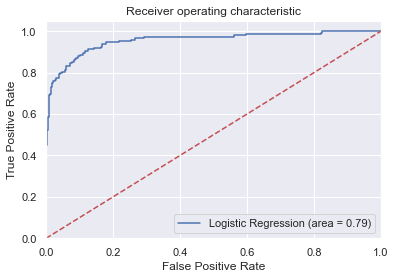

In [52]:
# !pip install yellowbrick

# Additional

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [53]:
model_score = logreg.score(x_test, y_test)
print(model_score)

0.952


In [54]:
from numpy import sqrt
from numpy import argmax


#add a threshold
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


Best Threshold=0.076249, G-Mean=0.894


# 5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)


In [55]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = x_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
13,Education_3,3.56
12,Education_2,3.33
6,CD Account,2.96
10,Family_3,2.12
11,Family_4,1.39
8,CreditCard,0.77
5,Securities Account,0.72
7,Online,0.47
3,CCAvg,0.22
9,Family_2,0.11


In [56]:
# To display all columns of test dataset, where Observed Personal Loan is not equal to Predicted Personal Loan
z [ z ['Observed Personal Loan'] !=z['Predicted Persoanal Loan'] ]



,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Observed Personal Loan,Predicted Persoanal Loan
932,51,27,112,1.8,0,1,1,1,1,0,1,0,1,0,0,1
3347,65,41,78,2.0,0,0,1,1,1,0,1,0,0,1,0,1
4377,33,8,145,2.7,0,0,0,1,0,0,0,0,0,1,1,0
3988,59,35,85,3.4,0,0,1,0,1,0,0,0,0,1,1,0
3271,52,27,93,4.1,0,0,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,35,9,113,0.8,0,0,0,1,0,0,1,0,0,1,1,0
813,50,25,130,1.1,0,0,0,1,0,0,0,0,1,0,1,0
3766,59,35,108,3.8,304,0,0,1,0,0,0,1,1,0,1,0
421,28,3,115,3.1,0,0,0,0,0,0,0,1,1,0,1,0


# 6. Give conclusion related to the Business understanding of your model? (5 marks)

This is to help Thera Bank with their campaign to convert theier liability customers to Personal Loan customers.

And the objective of this classification model is to predict the likelihood of a liability customer buying personal loans.

Evaludation metrics of this logistic regression model:

Testing accuracy : 0.952

Recall: 0.5838926174496645

Precision: 0.8969072164948454

F1 Score: 0.7073170731707318

Roc Auc Score: 0.7882453464746472

Looking at these metrics above, this model looks to be performing really well to predict the likelihood of customer buying personal loans. With the optimal threshold value of 0.076249, theese probabilistic values can be converted to either 0 or 1 and decision can be taken whether to target the customer for the personal loan marketing or not. Coefficient for the educatoon is really hight and people with the higher education are expected to take more personal loan.

Overall, this model can help the bank to target the right customer to reduce the marketing cost and increase the return on investment.